# GA Visualization

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

run_stats = pd.read_csv('ga_run_stats.iteration.csv')
dup_stats = pd.read_csv('ga_run_stats.duplicates.csv')

sector_list = run_stats['SectorId'].unique()
sector_list.sort()

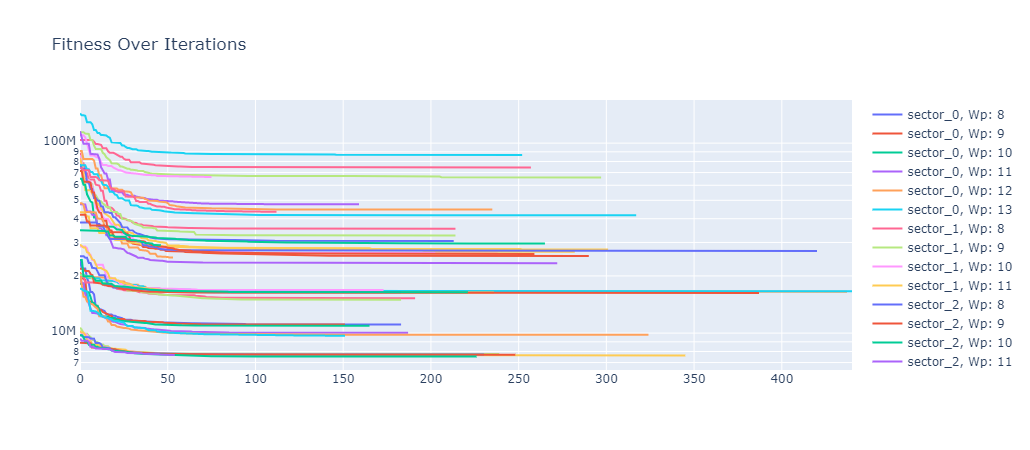

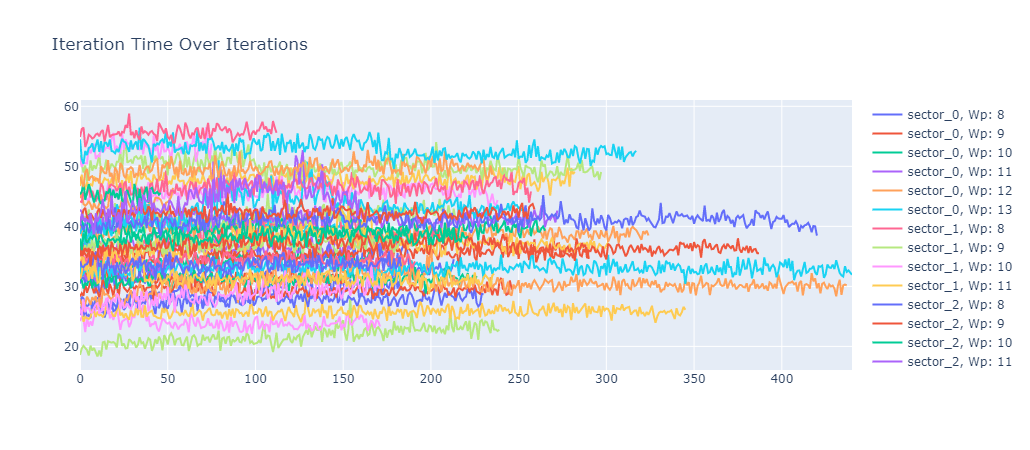

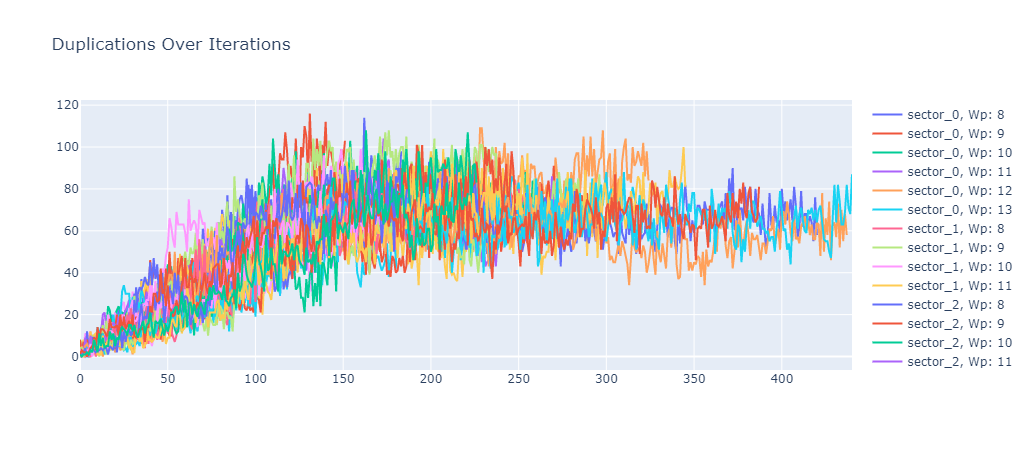

In [2]:
fig1 = go.Figure()
fig1.update_layout(
    title='Fitness Over Iterations',
    autosize=True,
    hovermode='closest',
    showlegend=True
)

fig2 = go.Figure()
fig2.update_layout(
    title='Iteration Time Over Iterations',
    autosize=True,
    hovermode='closest',
    showlegend=True
)

fig3 = go.Figure()
fig3.update_layout(
    title='Duplications Over Iterations',
    autosize=True,
    hovermode='closest',
    showlegend=True
)

for sector in sector_list:
    
    #  Get the list of points for sector
    sector_stats = run_stats.loc[run_stats['SectorId'] == sector]
    sector_dups  = dup_stats.loc[dup_stats['SectorId'] == sector]
    
    wps = sector_stats['NumWaypoints'].unique()
    for wp in wps:

        #  Update Figure 1
        fig1.add_trace( go.Scatter( x=sector_stats.loc[sector_stats['NumWaypoints'] == wp]['Iteration'],
                                    y=sector_stats.loc[sector_stats['NumWaypoints'] == wp]['BestFitness'],
                                    name='{}, Wp: {}'.format(sector,wp),
                                    mode='lines'))
        fig1.update_yaxes(type="log")
        
        #  Update Figure 2
        fig2.add_trace( go.Scatter( x=sector_stats.loc[sector_stats['NumWaypoints'] == wp]['Iteration'],
                                    y=sector_stats.loc[sector_stats['NumWaypoints'] == wp]['IterationTimeSec'],
                                    name='{}, Wp: {}'.format(sector,wp),
                                    mode='lines'))
        
        #  Update Figure 3
        fig3.add_trace( go.Scatter( x=sector_dups.loc[sector_dups['NumWaypoints'] == wp]['Iteration'],
                                    y=sector_dups.loc[sector_dups['NumWaypoints'] == wp]['NumberDuplicates'],
                                    name='{}, Wp: {}'.format(sector,wp),
                                    mode='lines'))

fig1.show()
fig2.show()
fig3.show()